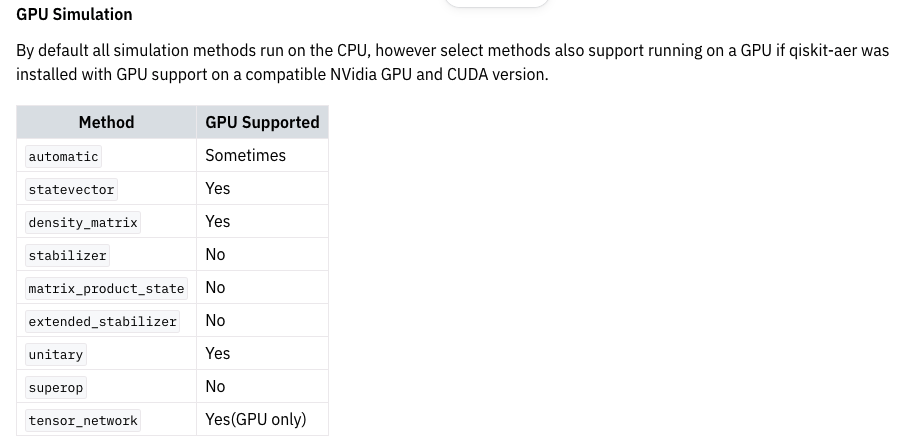

In [ ]:
#python==3.12.0 까지 qiskit-aer-gpu에서 지원

%pip install qiskit==1.2.0
%pip install qiskit-aer-gpu==0.15.1
%pip install qiskit-aer==0.17.2

In [ ]:
%pip show qiskit
%pip show qiskit_aer
%pip show qiskit_aer_gpu

Name: qiskit
Version: 1.2.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /home/mkbahk/.local/lib/python3.10/site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-aer-gpu
Note: you may need to restart the kernel to use updated packages.
Name: qiskit-aer
Version: 0.17.2
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /home/mkbahk/.local/lib/python3.10/site-packages
Requires: numpy, psutil, python-dateutil, qiskit, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.
Name: qiskit-aer-gpu
Vers

In [ ]:
from qiskit_aer import AerSimulator

In [ ]:
# 1. Create an instance of the AerSimulator class
simulator_instance = AerSimulator()

# 2. Call the available_devices() method on the instance
devices = simulator_instance.available_devices()

# Now you can use the 'devices' variable
print(devices)

('CPU', 'GPU')


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler

In [ ]:

# 2큐비트 Bell 상태 회로 생성
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# SamplerV2 생성 (GPU 사용을 위한 옵션 설정)
sampler = Sampler(
    options={
        #"default_shots": 1024,  # 기본 샷 수
        "backend_options": {
            "method": "statevector",  # GPU 지원 메서드 (statevector 추천)
            "device": "GPU",          # GPU 사용 지정
            # "cuStateVec_enable": True  # (선택) cuStateVec 사용 시 더 빠름 (cuQuantum 설치 필요)
        }
    }
)

# PUB 형식으로 실행 (circuit, parameters(없으면 None), shots)
pub = (qc, None, 1024)  # shots를 별도로 지정 가능

# 실행
job = sampler.run([pub])
result = job.result()

# 결과 출력
counts = result[0].data.c.get_counts()
print("측정 결과 (counts):", counts)


측정 결과 (counts): {'11': 519, '00': 505}


In [ ]:
backend = AerSimulator(
    device="GPU",
    method="statevector",   # GPU에서 가장 효율적
    #cuStateVec_enable=True
)

# ---------------------------
# 4. 실행
# ---------------------------
job = backend.run([qc])
result = job.result()

In [ ]:
# ---------------------------
# 5. 결과 출력
# ---------------------------
counts = result.get_counts()
print("Quasi-probability distribution:")
print(counts)

Quasi-probability distribution:
{'00': 500, '11': 524}


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler
from qiskit_aer.primitives import SamplerV2

In [ ]:
# 1. GPU 가속을 사용하는 AerSimulator 설정
# 배정밀도(double precision) 연산을 위해 device="GPU"를 설정합니다.
gpu_backend = AerSimulator(method="statevector", device="GPU")

# 2. 양자 회로 생성 (예: 3큐비트 GHZ 상태)
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# 3. SamplerV2 인스턴스 생성
# backend 인자로 위에서 만든 gpu_backend를 전달합니다.
#sampler = SamplerV2(backend=gpu_backend)

# 4. 작업(Job) 실행 및 결과 추출
# SamplerV2는 'pub'(Primitive Unified Bloc) 리스트를 받습니다.
job = gpu_backend.run([qc], shots=1024)
result = job.result()

# 5. 첫 번째 회로에 대한 결과 데이터 확인
#pub_result = result[0]
#counts = pub_result.data.meas.get_counts()
counts = result.get_counts()
print(f"GPU 시뮬레이션 결과: {counts}")

GPU 시뮬레이션 결과: {'000': 515, '111': 509}


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2
import numpy as np

In [ ]:


# 1. 양자회로 생성 (벨 상태 + 측정)
qc = QuantumCircuit(3, 3)

# 첫 번째 큐비트에 Hadamard 게이트 적용
qc.h(0)

# CNOT 게이트로 얽힘 생성
qc.cx(0, 1)
qc.cx(1, 2)

# 추가적인 게이트 적용
qc.rz(np.pi/4, 0)
qc.rx(np.pi/3, 1)
qc.ry(np.pi/6, 2)

# 측정
qc.measure([0, 1, 2], [0, 1, 2])

print("양자회로:")
print(qc.draw())

# 2. GPU 백엔드 설정
# method='statevector' 또는 'density_matrix' 사용 가능
# device='GPU'로 설정하여 GPU 사용
backend = AerSimulator(method='statevector', device='GPU')

# GPU 정보 확인
print("\n백엔드 정보:")
print(f"Backend name: {backend.name}")
print(f"Backend version: {backend.version}")

# 3. SamplerV2 생성
sampler = BackendSamplerV2(backend=backend)

# 4. 회로 실행
print("\n양자회로 실행 중...")
job = sampler.run([qc], shots=10000)

# 5. 결과 가져오기
result = job.result()

# 6. 결과 분석
print("\n=== 측정 결과 ===")
pub_result = result[0]  # 첫 번째 (그리고 유일한) PUB의 결과

# 측정 결과의 비트 문자열과 카운트
data = pub_result.data
counts = data.c.get_counts()

print(f"\n총 샷 수: {sum(counts.values())}")
print("\n측정 결과 분포:")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    probability = count / sum(counts.values())
    print(f"{bitstring}: {count:5d} ({probability*100:6.2f}%)")
###for

# 7. 추가 예제: 여러 회로를 동시에 실행
print("\n\n=== 여러 회로 동시 실행 예제 ===")

circuits = []
for i in range(3):
    qc_multi = QuantumCircuit(2, 2)
    qc_multi.h(0)
    qc_multi.cx(0, 1)
    qc_multi.rz(i * np.pi/4, 0)  # 각 회로마다 다른 회전각
    qc_multi.measure([0, 1], [0, 1])
    circuits.append(qc_multi)
###for

# 여러 회로를 한 번에 실행
job_multi = sampler.run(circuits, shots=5000)
result_multi = job_multi.result()

for idx, pub_result in enumerate(result_multi):
    counts = pub_result.data.c.get_counts()
    print(f"\n회로 {idx+1} 결과:")
    for bitstring, count in sorted(counts.items()):
        print(f"  {bitstring}: {count}")
    ###for
###for

양자회로:
     ┌───┐     ┌─────────┐           ┌─┐      
q_0: ┤ H ├──■──┤ Rz(π/4) ├───────────┤M├──────
     └───┘┌─┴─┐└─────────┘┌─────────┐└╥┘┌─┐   
q_1: ─────┤ X ├─────■─────┤ Rx(π/3) ├─╫─┤M├───
          └───┘   ┌─┴─┐   ├─────────┤ ║ └╥┘┌─┐
q_2: ─────────────┤ X ├───┤ Ry(π/6) ├─╫──╫─┤M├
                  └───┘   └─────────┘ ║  ║ └╥┘
c: 3/═════════════════════════════════╩══╩══╩═
                                      0  1  2 

백엔드 정보:
Backend name: aer_simulator_statevector_gpu
Backend version: 2

양자회로 실행 중...

=== 측정 결과 ===

총 샷 수: 10000

측정 결과 분포:
000:  3529 ( 35.29%)
111:  3514 ( 35.14%)
010:  1156 ( 11.56%)
101:  1156 ( 11.56%)
011:   248 (  2.48%)
100:   235 (  2.35%)
110:    89 (  0.89%)
001:    73 (  0.73%)


=== 여러 회로 동시 실행 예제 ===

회로 1 결과:
  00: 2557
  11: 2443

회로 2 결과:
  00: 2416
  11: 2584

회로 3 결과:
  00: 2560
  11: 2440


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

# 1. 양자 회로 생성 (Bell State)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# 2. GPU용 AerSimulator 설정
# method='statevector' 혹은 'density_matrix' 등을 선택할 수 있습니다.
# device='GPU'로 설정하여 GPU 가속을 활성화합니다.
backend_gpu = AerSimulator(method='statevector', device='GPU')

# GPU 사용 가능 여부 확인 (선택 사항)
config = backend_gpu.configuration()
print(f"Backend Name: {config.backend_name}")
#print(f"Simulation Method: {config.method}")
print(f"Computing Device: {backend_gpu.options.device}")

# 3. SamplerV2 인스턴스 생성 (GPU 백엔드 연결)
#sampler = Sampler(backend=backend_gpu)

# 4. 회로 실행 (1024번 샷)
# SamplerV2는 (circuit, parameter_values, shots) 튜플 형태의 'pub'을 받습니다.
job = backend.run(qc, shots=1024)
result = job.result()

# 5. 결과 해석
# 첫 번째 pub의 결과를 가져옵니다.
#pub_result = result[0]
#counts = pub_result.data.meas.get_counts()
counts = result.get_counts()

print("\n--- 결과 (Counts) ---")
print(counts)

# (로컬 환경인 경우) 히스토그램 출력
# plot_histogram(counts).show()

Backend Name: aer_simulator_statevector_gpu
Computing Device: GPU

--- 결과 (Counts) ---
{'00': 490, '11': 534}


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

# 1. 양자회로 생성 (Bell 상태 생성 예제)
qc = QuantumCircuit(2, 2)
qc.h(0)  # 첫 번째 큐비트에 Hadamard 게이트
qc.cx(0, 1)  # CNOT 게이트로 얽힘 상태 생성
qc.measure([0, 1], [0, 1])  # 측정

# 2. GPU 백엔드 설정
gpu_backend = AerSimulator(method='statevector', device='GPU')

# 3. SamplerV2 생성
sampler = BackendSamplerV2(backend=gpu_backend)

# 4. 회로 실행
job = sampler.run([qc], shots=8192)
result = job.result()

# 5. 결과 출력
pub_result = result[0]
counts = pub_result.data.c.get_counts()

print("=== 양자회로 시뮬레이션 결과 ===")
print(f"측정 결과: {counts}")
print(f"\n회로 다이어그램:")
print(qc.draw())

# 6. 결과 분석
print("\n=== 확률 분포 ===")
total_shots = sum(counts.values())
for bitstring, count in sorted(counts.items()):
    probability = count / total_shots
    print(f"{bitstring}: {count}회 ({probability:.2%})")
###for


=== 양자회로 시뮬레이션 결과 ===
측정 결과: {'11': 4057, '00': 4135}

회로 다이어그램:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

=== 확률 분포 ===
00: 4135회 (50.48%)
11: 4057회 (49.52%)


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2
import numpy as np

# 여러 양자회로 생성
circuits = []

# 회로 1: Bell 상태
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.cx(0, 1)
qc1.measure([0, 1], [0, 1])
circuits.append(qc1)

# 회로 2: GHZ 상태 (3큐비트)
qc2 = QuantumCircuit(3, 3)
qc2.h(0)
qc2.cx(0, 1)
qc2.cx(0, 2)
qc2.measure([0, 1, 2], [0, 1, 2])
circuits.append(qc2)

# 회로 3: 랜덤 회로
qc3 = QuantumCircuit(2, 2)
qc3.rx(np.pi/4, 0)
qc3.ry(np.pi/3, 1)
qc3.cz(0, 1)
qc3.measure([0, 1], [0, 1])
circuits.append(qc3)

# GPU 백엔드 설정 (추가 옵션 포함)
gpu_backend = AerSimulator(
    method='statevector',
    device='GPU',
    #precision='single'  # 성능 향상을 위한 단정밀도
    precision='double'  # 성능 향상을 위한 단정밀도
)

# SamplerV2로 모든 회로 실행
sampler = BackendSamplerV2(backend=gpu_backend)
job = sampler.run(circuits, shots=8192)
result = job.result()

# 결과 출력
for i, pub_result in enumerate(result):
    print(f"\n=== 회로 {i+1} 결과 ===")
    counts = pub_result.data.c.get_counts()
    print(f"측정 결과: {counts}")

    total = sum(counts.values())
    print("확률 분포:")
    for bitstring, count in sorted(counts.items()):
        print(f"  {bitstring}: {count/total:.3f}")
    ###for
###for


=== 회로 1 결과 ===
측정 결과: {'00': 3964, '11': 4228}
확률 분포:
  00: 0.484
  11: 0.516

=== 회로 2 결과 ===
측정 결과: {'111': 4121, '000': 4071}
확률 분포:
  000: 0.497
  111: 0.503

=== 회로 3 결과 ===
측정 결과: {'00': 5265, '01': 928, '10': 1688, '11': 311}
확률 분포:
  00: 0.643
  01: 0.113
  10: 0.206
  11: 0.038


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

# 1. 간단한 양자회로 생성
qc = QuantumCircuit(2)
qc.h(0)          # 첫 번째 큐비트에 Hadamard 게이트
qc.cx(0, 1)      # CNOT 게이트로 얽힘 생성
qc.measure_all() # 모든 큐비트 측정

# 2. AerSimulator를 GPU 모드로 설정
# 'aer_simulator'에 device='GPU' 옵션을 줄 수 있음
simulator = AerSimulator(device='GPU')

# 3. SamplerV2를 이용해 샘플링 실행
sampler = BackendSamplerV2(backend=simulator)
job = sampler.run([qc], shots=8192)   # 여러 회로를 리스트로 전달 가능
result = job.result()

# 4. 결과 출력
print("샘플링 결과:", result)


샘플링 결과: PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=8192, num_bits=2>)), metadata={'shots': 8192, 'circuit_metadata': {}})], metadata={'version': 2})


In [ ]:
# qiskit-aer-gpu 설치 예:
#   pip install "qiskit-aer-gpu"    # CUDA 12
#   또는
#   pip install "qiskit-aer-gpu-cu11"  # CUDA 11.x
# [web:17]

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

# 1. GPU 백엔드 생성 (statevector_gpu 메서드 사용)
sim = AerSimulator(
    method="statevector",   # GPU용 시뮬레이션 메서드[web:9][web:17]
    device="GPU"
)

# 2. 간단한 Bell 상태 회로 생성
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# 3. GPU 백엔드에 맞게 회로 transpile
bell_t = transpile(bell, sim, optimization_level=0)

# 4. SamplerV2 생성 시 Aer 옵션으로 GPU 백엔드 지정
sampler = BackendSamplerV2(backend=sim)  # Aer SamplerV2는 backend 옵션을 받는다.[web:11][web:17]

# 5. 샘플링 실행: Bell 회로에서 1024 샷 수집
job = sampler.run([bell_t], shots=8192)  # SamplerV2는 (회로, 파라미터, 샷) 묶음(PUB)을 처리.[web:11]
result = job.result()


In [ ]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=8192, num_bits=2>)), metadata={'shots': 8192, 'circuit_metadata': {}})], metadata={'version': 2})

In [ ]:
# 6. 측정 결과 출력
counts = result[0].data.meas.get_counts()
print("Bell 회로 측정 결과 (GPU 시뮬레이션):", counts)

In [ ]:
# 필요한 라이브러리 임포트
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import SamplerV2

# 양자 레지스터와 고전 레지스터 생성
qra = QuantumRegister(2, 'qra')
qrb = QuantumRegister(3, 'qrb')
cra = ClassicalRegister(2, 'cra')
crb = ClassicalRegister(3, 'crb')

# 양자 회로 생성
qc = QuantumCircuit(qra, qrb, cra, crb)
qc.h(qra)  # Hadamard 게이트 적용
qc.cx(qra[0], qrb[0])  # CNOT 게이트
qc.cx(qra[1], qrb[1])  # CNOT 게이트
qc.cx(qrb[0], qrb[2])  # CNOT 게이트
qc.measure(qra, cra)  # 양자 비트 측정
qc.measure(qrb, crb)  # 양자 비트 측정

# SamplerV2를 사용하여 회로 실행
sampler = SamplerV2(options={'backend_options': {'device': 'GPU'}})
job = sampler.run([qc], shots=1024)  # 1024 샷으로 실행

# 결과 출력
result = job.result()

In [ ]:
result

PrimitiveResult([SamplerPubResult(data=DataBin(cra=BitArray(<shape=(), num_shots=1024, num_bits=2>), crb=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'shots': 1024, 'circuit_metadata': {}, 'simulator_metadata': {'time_taken_parameter_binding': 4.8043e-05, 'time_taken_execute': 0.006569674, 'omp_enabled': True, 'max_gpu_memory_mb': 48210, 'max_memory_mb': 708698, 'parallel_experiments': 1}})], metadata={'version': 2})

In [ ]:
counts = result[0].data.cra.get_counts()
print("측정 결과:", counts)

측정 결과: {'11': 266, '01': 243, '00': 248, '10': 267}


In [ ]:
counts = result[0].data.crb.get_counts()
print("측정 결과:", counts)

측정 결과: {'111': 266, '101': 243, '000': 248, '010': 267}
